<hr style="border:1px solid #808080">                                                                                                                   </hr>
<h1 style="color:#0176DE;text-align:center;margin:0;padding-top:0;"> <b>Ayudantía 9 - Integración numérica de EDOs</b>                                                                           </h1>
<h1 style="color:#0176DE;text-align:center;margin:0;padding-top:0;"> <b>IBM/ICE2020 Introducción a la Biomecánica</b>                                                                           </h1>
<p style=padding:0;margin:0>
<h3 style="color:#c1ccdb;text-align:center;margin:0;padding:0;"> Profesor - <span style="color:#dbdbdb;text-align:center;"><b>Daniel Hurtado</b></span></h3>
<h3 style="color:#c1ccdb;text-align:center;margin:0;padding:0;">Ayudantes - <span style="color:#dbdbdb;text-align:center;"><b>Bastián Herrera, Victoria Alfaro, Jorge Villagra</b></span>                               </h3> 
</p>
<h4 style="color:#dbdbdb;text-align:center;margin:0;padding:0;">Instituto de Ingeniería Biológica y Médica<br>Escuela de Ingeniería<br>  Pontificia Universidad Católica de Chile <br>    </h4>
Adaptado del tutorial de Pablo Zurita.
<hr style="border:1px solid #808080">  


Es común en el mundo físico encontrarse con leyes diferenciales que definan un comportamiento o un sistema. Estas muchas veces pueden solucionarse mediante diversos métodos, por ejemplo, el factor integrante para ecuaciones lineales (como las de viscoelasticidad). Sin embargo, en general esto no es así. Consideremos una ecuación diferencial ordinaria

$$
    \frac{\mathrm{d}y}{\mathrm{d}t} = f(y, t, \theta)
$$

donde $y : \mathbb{R} \to \mathbb{R}^{n}$ y $f : \mathbb{R}^{n} \times \mathbb{R} \times \Omega \to \mathbb{R}^{n}$. Es decir, un sistema arbitrario de $n$ ecuaciones diferenciales ordinarias de primer orden.

Sin conocimiento particular sobre $f$, no podemos resolver esta ecuación. Sim embargo, se han desarrollado muchos **métodos numéricos** para calcular, a partir de esta ecuación, una buena aproximación de $y(t)$. Una implementación de rutinas para una buena variedad de problemas que se pueden plantear en esta forma es `odeint` de la librería de computación científica `SciPy`.

In [19]:
import scipy.integrate as sp
import numpy as np
import matplotlib.pyplot as plt

Consideremos la ecuación diferencial

$$
    \dot{y}(t) = -ky + kf(t)
$$

donde

$$
    f(t) = \lvert\sin{t}\rvert \text{.}
$$

Notemos que este sistema es difícil de tratar analíticamente debido al valor absoluto. ¿Cómo conseguimos una aproximación de $y$ con `odeint`? Necesitamos primero una función de `Python` que represente la derivada de la forma `foo(y, t, args)`.

In [20]:
k = 5

def f(t):
    return np.abs(np.sin(t))

def y_dot(y, t):
    return -k*y + k*f(t)

Luego generamos una grilla para la aproximación numérica y una condición inicial

In [21]:
t = np.linspace(0, 30, 1000)
y_0 = 3

... y resolvemos la ecuación.

In [22]:
y_solution = sp.odeint(y_dot, y_0, t)

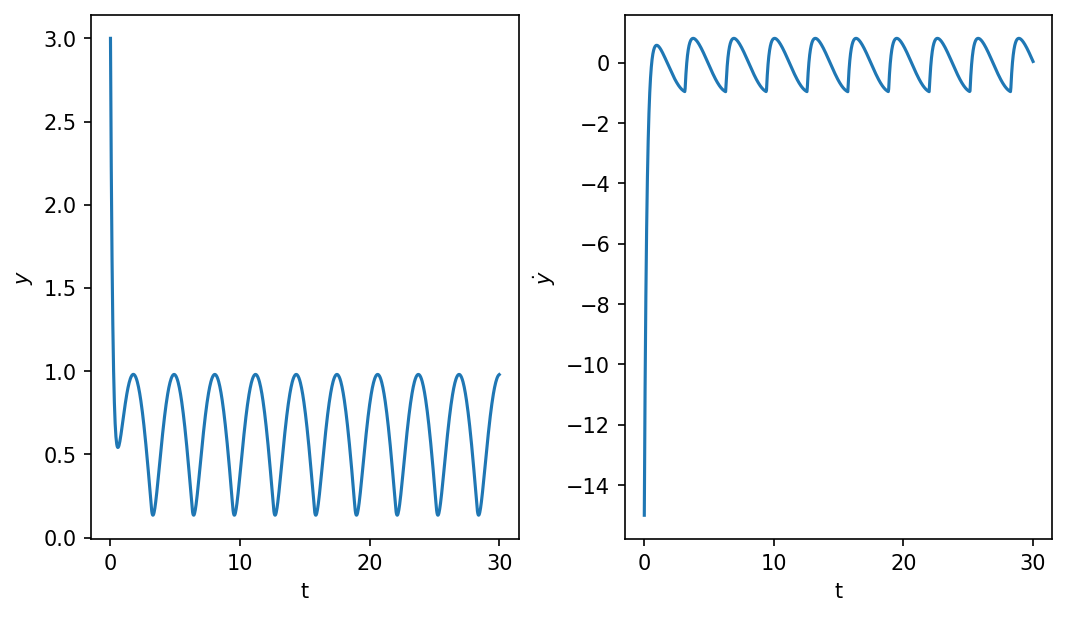

In [23]:
fig, ax = plt.subplots(1,2,figsize=(7,4), dpi=150, layout='constrained')

ax[0].plot(t, y_solution, label=r'$y$')
ax[1].plot(
    t, [y_dot(y_solution[i], t[i]) for i in range(len(t))], label=r'$\dot{y}$'
)
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[0].set_ylabel(r"$y$")
ax[1].set_ylabel(r"$\dot{y}$")
plt.show()

El valor inicial de $y_0=3$ se aleja del régimen estable, lo que no es necesariamente malo. Alterar la condición inicial no cambia el comportamiento global de la solución, y únicamente se altera la pendiente $\dot{y}$ durante el tramo inicial. Esto es solo un ejemplo, y es lo que esperamos que ocurra con una EDO cuyo lado derecho (forzante) es una función periódica en $t$.

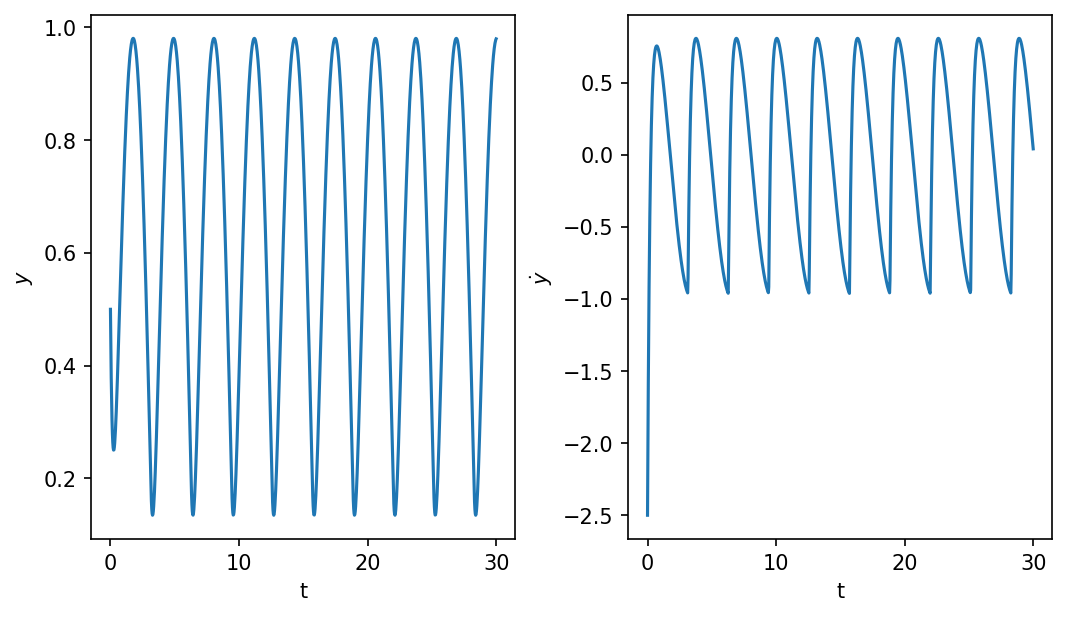

In [24]:
y_0_new = 0.5
new_y_solution = sp.odeint(y_dot, y_0_new, t)

fig, ax = plt.subplots(1,2,figsize=(7,4), dpi=150, layout='constrained')

ax[0].plot(t, new_y_solution, label=r'$y$')
ax[1].plot(
    t, [y_dot(new_y_solution[i], t[i]) for i in range(len(t))], label=r'$\dot{y}$'
)
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[0].set_ylabel(r"$y$")
ax[1].set_ylabel(r"$\dot{y}$")
plt.show()